In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [192]:
train = pd.read_csv('supermarket_sales - Sheet1.csv')

In [193]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [194]:
train.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

No NULL data present in the dataset.

In [195]:
train.shape

(1000, 17)

In [196]:
train.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


need to see the distriution of tax and total, they may not be normally distributed and may contain outliers. Lets proceed with EDA. our target class is ratings.

# EDA

<AxesSubplot:xlabel='Branch', ylabel='count'>

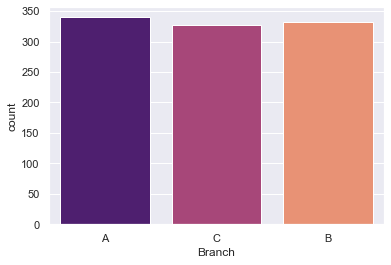

In [197]:
sns.set_theme()
sns.countplot(x = 'Branch', data = train, palette = "magma")

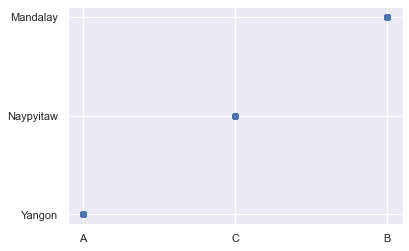

In [198]:
sns.set_theme()
plt.scatter(x = 'Branch', y = 'City', data = train)

we find that the number of branches are almost equal, and each branch corresponds to one city. this is an example of repetitive data and we will get rid of any one of these columns before model training. now lets observe the relation between customer type and gender.

<AxesSubplot:xlabel='Customer type', ylabel='count'>

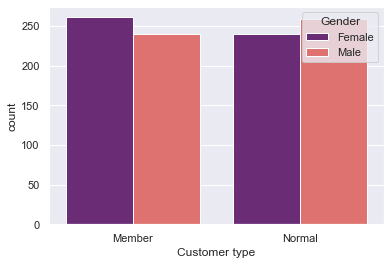

In [199]:
sns.set_theme()
sns.countplot(x = 'Customer type', data = train, hue = 'Gender', palette = "magma")

there is a noticeable difference between male and female population of each category. however, the same plot without says that the total number of ppl in both categories is almost equal. Also from the below given plot, gender also doesnt play a role in determining ratings.

<AxesSubplot:xlabel='Gender', ylabel='Rating'>

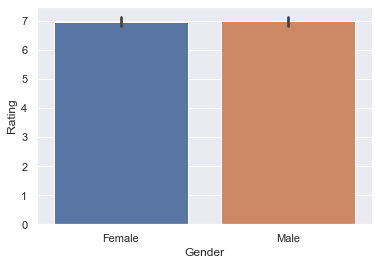

In [200]:
sns.set_theme()
sns.barplot( x = 'Gender', y = 'Rating', data = train)

In [161]:
np.corrcoef(train['Unit price'], train['Tax 5%'])

array([[1.        , 0.63396209],
       [0.63396209, 1.        ]])

In [162]:
np.corrcoef(train['Total'], train['Tax 5%'])

array([[1., 1.],
       [1., 1.]])

In [163]:
np.corrcoef(train['Quantity'], train['Tax 5%'])

array([[1.        , 0.70551019],
       [0.70551019, 1.        ]])

In [164]:
np.corrcoef(train['Total'], train['gross income'])

array([[1., 1.],
       [1., 1.]])

clearly, total and tax are perfectly correlated. same with total and gross income. we will drop tax, gross_income, columns before model training.

In [165]:
train.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

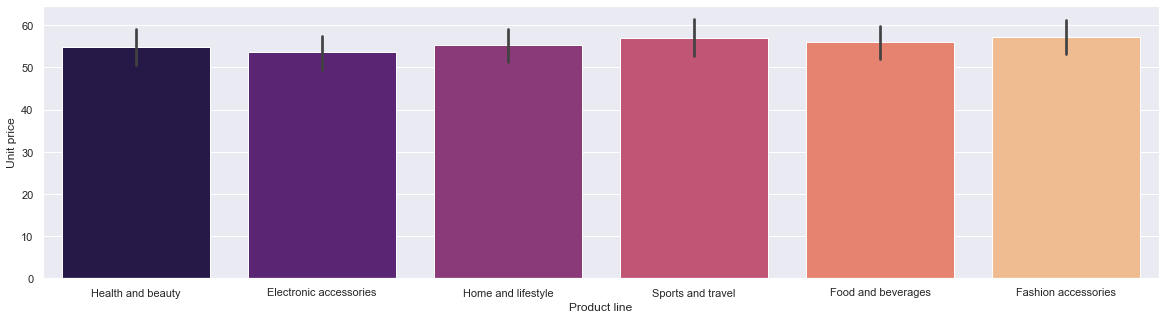

In [201]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = train, palette = 'magma')

<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

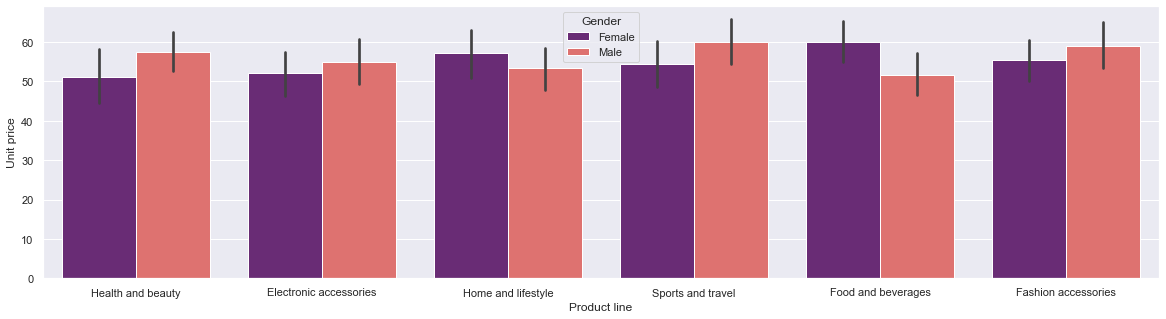

In [202]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = train, palette = 'magma', hue ='Gender')

the unit price of all product lines are nearly same as well as their error margins. this is also true when y = 'Ratings', the product unit price difference between both genders is slighly noticeable and has large margins, so maybe significant. if need be, product line column will also be dropped to improve performance.

<AxesSubplot:xlabel='Payment', ylabel='count'>

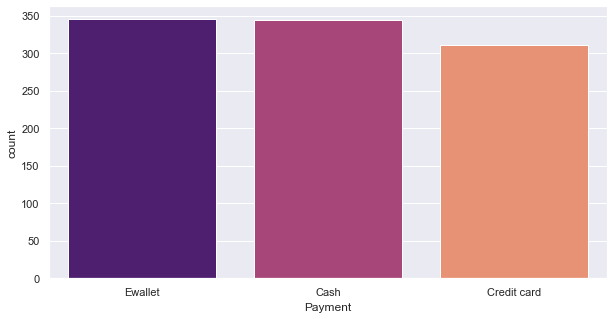

In [213]:
sns.set_theme()
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = train, palette = 'magma')

<AxesSubplot:xlabel='Payment', ylabel='count'>

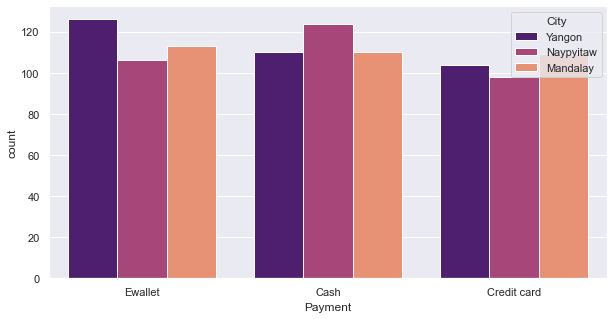

In [204]:
sns.set_theme()
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = train, hue = 'City',palette = 'magma')

<AxesSubplot:xlabel='Payment', ylabel='count'>

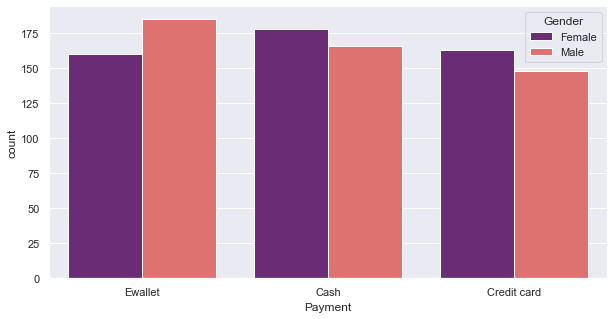

In [216]:
sns.set_theme()
plt.figure(figsize = (10,5))
sns.countplot(x = 'Payment', data = train, hue = 'Gender', palette = 'magma')

people use credit card less often than other options but the usage is still strongly comparable. within cities, the usage differs only by slight amounts. Not a eye-catching difference in gender specific usage either. lets see the relationship between ratings and payment method.

<AxesSubplot:xlabel='Payment', ylabel='Rating'>

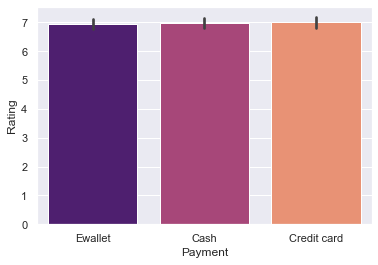

In [212]:
sns.barplot(x = 'Payment', y = 'Rating', data = train, palette = 'magma')

there is no noticeable variation here. payment may also be dropped.

<AxesSubplot:xlabel='City', ylabel='Rating'>

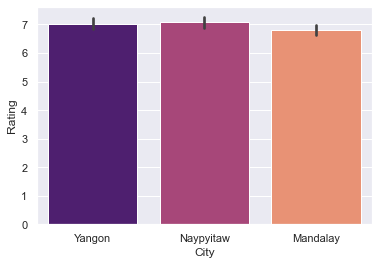

In [207]:
sns.set_theme()
sns.barplot(x = 'City', y = 'Rating', data = train, palette = 'magma')

mandalay branches recieve slightly lower ratings

<AxesSubplot:xlabel='Customer type', ylabel='Rating'>

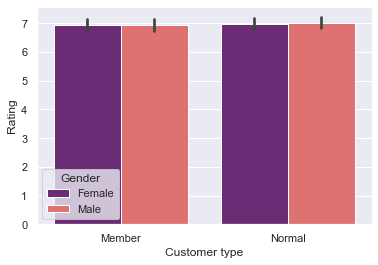

In [217]:
sns.set_theme()
sns.barplot(x = 'Customer type', y = 'Rating', data = train, hue = 'Gender', palette = 'magma')

gender and customer type also dont play any significantly varying role in determining ratings.

# Pre-proccessing

In [174]:
train.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

# Data Cleaning

since ID is going to be unqiue for everyone and gross % is same for all, we will drop both of these columns

In [175]:
train.drop(['Invoice ID','gross margin percentage'], axis = 1, inplace = True)

we have already established that city and branch are the same thing. we will be deleting branch. similarly, total, tax, gross income are perfectly correlated. we will be dropping tax and gross income.

In [176]:
train.drop(['Branch','Tax 5%','gross income','Date','Time'], axis = 1, inplace = True)

In [177]:
train.head()

,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,cogs,Rating
0,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,522.83,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,76.40,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,340.5255,Credit card,324.31,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,489.0480,Ewallet,465.76,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,634.3785,Ewallet,604.17,5.3


we will exclude date and time for now. however, if our model needs Improvements we will analyse these two columns and subsequently decide what we should do with them. now we will get the dummy variable format for the data

In [178]:
train_dummy = pd.get_dummies(train)

In [179]:
train_dummy.head()

,Unit price,Quantity,Total,cogs,Rating,City_Mandalay,City_Naypyitaw,City_Yangon,Customer type_Member,Customer type_Normal,...,Gender_Male,Product line_Electronic accessories,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Cash,Payment_Credit card,Payment_Ewallet
0,74.69,7,548.9715,522.83,9.1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1,15.28,5,80.2200,76.40,9.6,0,1,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,46.33,7,340.5255,324.31,7.4,0,0,1,0,1,...,1,0,0,0,0,1,0,0,1,0
3,58.22,8,489.0480,465.76,8.4,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,1
4,86.31,7,634.3785,604.17,5.3,0,0,1,0,1,...,1,0,0,0,0,0,1,0,0,1


In [180]:
train_dummy = train_dummy.round(0)

# Model Training

In [181]:
from sklearn.model_selection import train_test_split

In [182]:
X = train_dummy.drop('Rating', axis = 1)
y = train_dummy['Rating']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [184]:
from sklearn.tree import DecisionTreeClassifier

In [185]:
dtree = DecisionTreeClassifier()

In [186]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions

In [187]:
predictions = dtree.predict(X_test)

In [214]:
from sklearn import metrics

In [215]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.3033333333333332
MSE: 7.696666666666666
RMSE: 2.7742866951104146


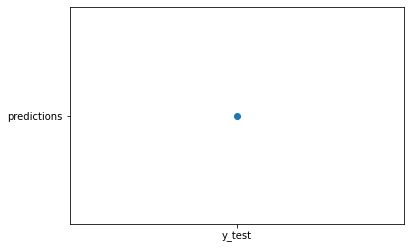

In [188]:
plt.scatter(x = 'y_test', y = 'predictions')

so, from decision tree, we get 100% accuracy. this concludes our analysis and model training for this dataset.